In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random 

import seaborn as sns
sns.set(color_codes=True)

First, create a population of 1000 elements with a mean of 100 and a standard deviation of 20.

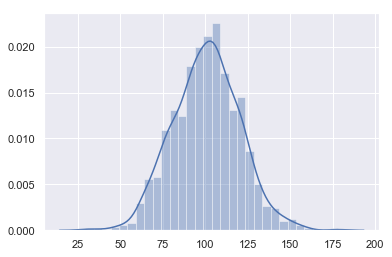

In [2]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop)

Now take two samples from this population and comment on the difference between their means and standard deviations. How would you ensure the independence between the elements of these samples?

In [3]:
k = 100
sample1 = np.random.choice(pop,100,replace=True)

print ("Sample 1 Summary")
stats.describe(sample1)

Sample 1 Summary


DescribeResult(nobs=100, minmax=(35.80019242517761, 143.72720602816366), mean=100.9228695770074, variance=404.6540851510831, skewness=-0.2344485814368554, kurtosis=0.07288063782467002)

In [4]:
sample2 = np.random.choice(pop,100,replace=True)
print ("Sample 2 Summary")
stats.describe(sample2)

Sample 2 Summary


DescribeResult(nobs=100, minmax=(29.27544839402772, 156.89033130415146), mean=101.46939808830103, variance=497.80317752167565, skewness=-0.010488449438542118, kurtosis=0.35720350747644236)

You can see can see that if you took two samples from this population, the difference between the mean of samples 1 and 2 is very small (this can be tried repeatedly). You must sample with replacement in order to ensure the independence assumption between elements of the sample.

There is, however, still a probability of seeing a very large difference between values, even though they're estimates of the same population parameters. In a statistical setting, you'd interpret these unusually large differences as evidence that the two samples are statistically different. It depends on how you define statistical significance. In statistical tests, this is done by setting a significance threshold $\alpha$ (alpha). Alpha controls how often we'll get a type 1 error. A type 1 error occurs when the statistical test erroneously indicates a significant result.

You can run two-sample t-test with independence assumption on these samples and, as expected, the null hypothesis will fail to be rejected due to similarities between distributions. You can also visualize the distribution to confirm the similarity between means and SDs.

In [5]:
# test the sample means
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-0.18192798147945916, pvalue=0.8558253619670926)

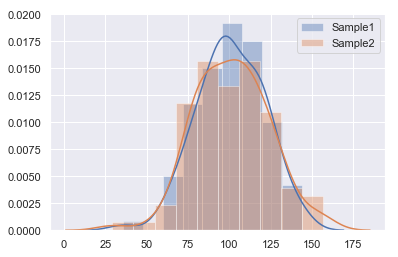

In [6]:
plt.figure("Test Samples")
sns.distplot(sample1, label='Sample1') 
sns.distplot(sample2, label='Sample2')
plt.legend()
plt.show()

Exercise: Write a function type_1_error in Python to encapsulate the code shown above in order to repeat hypothesis tests on two randomly drawn distributions. The t-test will mostly fail to reject the null hypothesis, except, when by random chance you get a set of extremely different samples thus reject the null hypothesis (TYPE I ERROR). The frequency of such bad results depends upon the value of alpha.

type_1_error should take in the parameters:

population: (numpy array) a random normal distribution
num_tests: (int) specifies the number of hypothesis tests to compute
alphas: (list) a list of the alpha levels at which you are testing
type_1_error should return:

sig_tests: (DataFrame) a dataframe that has the columns 'type_1_error', 'p_value', 'alpha'
Within type_1_error, you should:

Repeatedly take two random samples from population and run independent t-tests.
Store P_value, alpha and a boolean variable to show whether the null hypothesis ** was rejected ** or not (i.e. if p-value is less than alpha), for each test
To test your function:

Create a population distribution with a mean of 100, a standard deviation of 20, and a size of 1000
Specify the number of hypothesis tests to be 1000
Create a list of alphas = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

In [7]:
def type_1_error(population, num_tests, alpha_set):
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'
    """
    columns = ['type_1_error','p_val','alpha']
    sig_tests = pd.DataFrame(columns=columns)
    counter = 0
    
    for i in range(1,num_tests+1):
        
        for alpha in alpha_set:
            
            # take two samples from the same population
            samp1 = np.random.choice(population,100,replace=True)
            samp2 = np.random.choice(population,100,replace=True)
            
            # test sample means
            result = stats.ttest_ind(samp1, samp2)
            
            # evaluate whether null hypothesis is rejected or not
            if result[1] < alpha:
                 sig_tests.loc[counter] = [1, result[1], alpha]
            else:
                 sig_tests.loc[counter] = [0, result[1], alpha]

            counter += 1
            
    return sig_tests

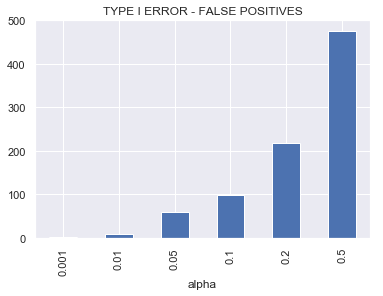

In [8]:
# group type 1 error by values of alpha
pop = np.random.normal(100, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_1 = type_1_error(pop, num_tests, alpha_set)
group_error = sig_tests_1.groupby('alpha')['type_1_error'].sum()
group_error.plot.bar(title = "TYPE I ERROR - FALSE POSITIVES")

In [9]:
def type_2_error(population, population_2, num_tests, alpha_set):
    
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    population_2: ndarray
        A different random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'
    """
    
    columns = ['type_2_error','p_val','alpha']
    sig_tests = pd.DataFrame(columns=columns)
    counter = 0
    
    for i in range(1,num_tests+1):
        
        for alpha in alpha_set:
            
            # take two samples from the same population
            samp1 = np.random.choice(population,100,replace=True)
            samp2 = np.random.choice(population_2,100,replace=True)
            
            # test sample means
            result = stats.ttest_ind(samp1, samp2)
            
            # evaluate whether null hypothesis is rejected or not
            if result[1] > alpha:
                 sig_tests.loc[counter] = [1, result[1], alpha]
            else:
                 sig_tests.loc[counter] = [0, result[1], alpha]

            counter += 1
            
    return sig_tests

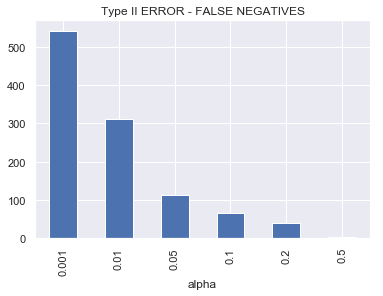

In [11]:
pop = np.random.normal(100, 20, 1000)
pop2 = np.random.normal(110, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_2 = type_2_error(pop,pop2,num_tests,alpha_set)

group_error2 = sig_tests_2.groupby('alpha')['type_2_error'].sum()
group_error2.plot.bar(title = "Type II ERROR - FALSE NEGATIVES")